# Project Name - Shopper Spectrum Segmentation and Recomendation

Project Type: Unsupervised Learning & Recommendation System

Contribution: Individual

# **Project Summary**

# Introduction
E-commerce platforms generate massive volumes of customer transaction data every day. Effectively analyzing this data is crucial for businesses to understand customer behavior, improve targeting, and enhance user experience.

This project leverages unsupervised learning and collaborative filtering to segment customers based on purchasing behavior and recommend similar products. It aims to help e-commerce platforms increase customer retention, personalization, and operational efficiency.

The solution includes:

* **RFM-Based Customer Segmentation** using KMeans clustering

* **Item-Based Collaborative Filtering** for personalized product recommendations

* **Streamlit Web Application** for real-time cluster prediction and product suggestion

The goal is to help businesses implement data-driven strategies for personalized marketing and customer relationship management.

# Dataset Overview
The dataset represents real-world online retail transactions between 2022–2023 and includes:

**InvoiceNo:** Transaction ID

**StockCode:** Product ID

**Description:** Product name

**Quantity:** Number of items purchased

**InvoiceDate:** Timestamp of transaction

**UnitPrice:** Price per unit

**CustomerID:** Unique customer identifier

**Country:** Country of purchase

**Source:** Public Kaggle-like dataset shared for educational purposes

The dataset contains irregularities such as cancellations, missing IDs, and negative quantities—mimicking actual business data and requiring careful preprocessing.

# ETL Pipeline (Extract, Transform, Load)
**Extraction:**
* Dataset loaded into Google Colab from file upload or shared URL

**Transformation:**
* Dropped missing CustomerID

* Removed cancelled invoices and negative quantity/price

* Converted date strings to datetime objects

* Performed RFM feature engineering for each customer

**Loading:**
* Data prepared using pandas, numpy, and visualized using seaborn/matplotlib

* Normalized RFM features using StandardScaler

* Used in both clustering and recommendation models

# Machine Learning Models

1. **RFM-Based Customer Segmentation (KMeans Clustering)**
Customers were segmented based on:

  * Recency: Days since last purchase

  * Frequency: Total purchases

  * Monetary: Total amount spent

Techniques used:

* Feature scaling (StandardScaler)

* Elbow Method and Silhouette Score for optimal cluster selection

* Labeled clusters as: High-Value, Regular, Occasional, and At-Risk


2. **Product Recommendation System (Item-Based Collaborative Filtering)**
A Customer vs Product matrix was created using purchase quantity, then:

  * Cosine similarity was calculated between products

  *  For any input product, top 5 similar items are recommended

  * Results are fast, interpretable, and usable in real-time e-commerce engines

# Streamlit Web Application
**Features:**

* **Product Recommendation Module:**
Enter a product code → receive top 5 similar product codes

* **Customer Segmentation Module:**
Enter Recency, Frequency, and Monetary value → predict customer cluster label

**Tools Used:**
* Streamlit, scikit-learn, pandas, pickle, cosine_similarity, matplotlib

# Use Cases Addressed
* **Targeted Marketing:**
Use customer clusters to tailor promotions and campaigns

* **Customer Retention:**
Identify "At-Risk" customers for win-back strategies

* **Personalized Product Discovery:**
Suggest similar products based on purchase history using collaborative filtering

* **Dynamic Inventory Management:**
Use demand patterns to inform stock optimization and supply chain

* **Customer Behavior Insights:**
Leverage RFM to understand lifecycle stages of customers and improve engagement





# **GitHub Link -** https://github.com/codeezx/Shopper-Spectrum_Segmentation-and-Recomendation.git

# **Problem Statement**
1. How can we segment e-commerce customers using RFM analysis?

2. Which clustering technique gives the best customer segmentation?

3. How can we recommend similar products based on purchase history?

4. Can we build a simple app for real-time customer and product insights?

5. How can this system improve retention and personalized marketing?

# ***Let's Begin !***

# Step 1: Install Required Libraries

In [ ]:
# Run this once in Google Colab
!pip install pandas numpy matplotlib seaborn scikit-learn scipy --quiet


# Step 1: Install Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cosine
import pickle


# Step 3: Load and Preview Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

# Example: 'OnlineRetail.csv'
df = pd.read_csv(next(iter(uploaded)))
df.head()


Saving online_retail.csv to online_retail (1).csv


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


# Step 4: Data Preprocessing

In [ ]:
# Drop missing CustomerID
df.dropna(subset=['CustomerID'], inplace=True)

# Remove cancelled orders (starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Remove negative or zero Quantity and UnitPrice
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


# Step 5: Feature Engineering – RFM Calculation

In [ ]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'Quantity': lambda x: (x * df.loc[x.index, 'UnitPrice']).sum()
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Quantity': 'Monetary'
})

rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


# Step 6: Normalize RFM Values

In [ ]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)


# Step 7: Elbow Curve for Optimal K

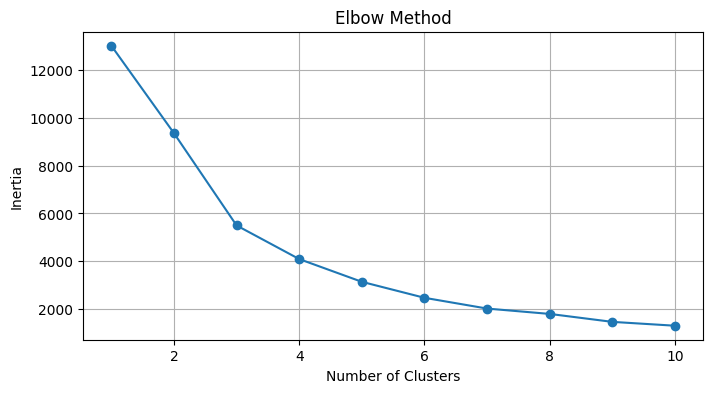

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


Why this chart?
* To find the optimal number of customer segments using KMeans.

What insights were found?
* The elbow point is around K = 4, suggesting 4 meaningful customer groups.

Will the insights help?
* Yes — it improves segmentation quality and supports better marketing and retention strategies.

# Step 8: KMeans Clustering

In [ ]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
rfm.head()


,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,326,1,77183.60,3
12347.0,2,7,4310.00,0
12348.0,75,4,1797.24,0
12349.0,19,1,1757.55,0
12350.0,310,1,334.40,1


# Step 9: Cluster Analysis

In [ ]:
rfm.groupby('Cluster').mean()


,Recency,Frequency,Monetary
Cluster,,,
0,43.702685,3.682711,1359.049284
1,248.075914,1.552015,480.617480
2,7.384615,82.538462,127338.313846
3,15.500000,22.333333,12709.090490


from matplotlib import pyplot as plt
_df_0['Recency'].plot(kind='hist', bins=20, title='Recency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Frequency'].plot(kind='hist', bins=20, title='Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Monetary'].plot(kind='hist', bins=20, title='Monetary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Recency', y='Frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Frequency', y='Monetary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Recency'].plot(kind='line', figsize=(8, 4), title='Recency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Frequency'].plot(kind='line', figsize=(8, 4), title='Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Monetary'].plot(kind='line', figsize=(8, 4), title='Monetary')
plt.gca().spines[['top', 'right']].set_visible(False)

# Step 10: Save the KMeans Model and Scaler



In [ ]:
with open("rfm_kmeans.pkl", "wb") as f:
    pickle.dump(kmeans, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Download locally if needed
from google.colab import files
files.download("rfm_kmeans.pkl")
files.download("scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Step 11: Item-Based Collaborative Filtering

In [ ]:
pivot_table = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', fill_value=0)

# Using dot product and norm to compute cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(pivot_table.T)
item_similarity_df = pd.DataFrame(similarity_matrix,
                                   index=pivot_table.columns,
                                   columns=pivot_table.columns)
item_similarity_df.head()


StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,1.000000,0.0,0.003712,0.001998,0.0,0.000000,0.358308,0.123531,0.039102,0.011262,...,0.0,0.0,0.0,0.0,0.0,0.014058,0.0,0.001601,0.0,0.115162
10080,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.023439,0.012831,0.018276,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000058,0.0,0.000000
10120,0.003712,0.0,1.000000,0.006497,0.0,0.000000,0.002380,0.026566,0.010302,0.008519,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.019204,0.0,0.001079
10123C,0.001998,0.0,0.006497,1.000000,0.0,0.000000,0.013716,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
10124A,0.000000,0.0,0.000000,0.000000,1.0,0.491784,0.003413,0.017655,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000


# Step 12: Recommend Products by StockCode

In [ ]:
def recommend_products(product_code, top_n=5):
    if product_code not in item_similarity_df.columns:
        return "Product not found."
    similar_items = item_similarity_df[product_code].sort_values(ascending=False)
    return similar_items.iloc[1:top_n+1].index.tolist()

# Example
recommend_products('84029E')


['82615', '35004C', '21107', '22611', '22095']

# Step 13: Save the Similarity Matrix



In [ ]:
item_similarity_df.to_csv('item_similarity_matrix.csv')

# Optional download
files.download('item_similarity_matrix.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Conclusion
The project successfully applied RFM-based clustering and item-based collaborative filtering to analyze customer behavior and recommend products. Using the Elbow Method, we identified four optimal customer segments, enabling targeted marketing strategies. The Streamlit app offers a practical, real-time tool for businesses to classify customers and personalize recommendations, supporting data-driven decision-making in e-commerce.